# 3.1 Solving Problems Breakout - Team X Zuse
Daniel L., Edward M., Rhitt C., Sai C.<br>

With your team answer the following problems documenting your algorithms and responses in the shared file for your team.



## Problem 1 - Searching
How many algorithms are there for solving the problem: Guess my number in a given interval say $[1,100]$?<br><br>

### Response:
Assumption: You are satisfied with an output equal to your number $x\in\mathbb{R}$ to a given number of decimal places.<br>Without this assumption, there are infinite candidates and so if $x$ is a non-terminatinating decimal or in a few other algorithm-specific cases, it is impossible for an algorithm to terminate (bad behaviour).<br><br>

Assumption: I can always compare my guesses with yours using $<$ and $=$ bolean operations (note that $=$ is represented as $==$ in many languages to differentiate with the assignment operator)<br><br>

Binary Search, Sequential Search, Random Guessing, etc.<br>
Theoretically $\infty$<br>



- The process for searching algorithms is as follows:
> 1. Make an estimate in interval
> 2. Compare that estimate with the true value
> 3. Use that information, and the well-ordering of the real numbers, to restrict interval(more on this below)
> 4. Repeat until estimate must be $x$

\begin{gather*}
\boxed{1,2,3,4,5,6,7,8}\\
\downarrow\\
1,2,\boxed{3,4,5,6,7,8}\\
\downarrow\\
1,2,\boxed{3,4,5,6,7},8\\
\downarrow\\
1,2,3,\boxed{4,5,6,7},8\\
\downarrow\\
1,2,3,\boxed{4,5},6,7,8\\
\downarrow\\
1,2,3,\boxed{4},5,6,7,8
\end{gather*}

$\qquad$Because there are infinite procedures one can take to make estimates (no one's stopping you from "estimating" a value correlating to the $100th$ sig. fig. of the velocity of your dog in $ms^{-1}$ at a given time, for instance), there are technically infinite ways to implement an algorithm, all with different runtimes depending on the inputs.
<br><br>
- However, without additional information, Binary Search is guaranteed to use the estimate that gives the most optimal average-time-complexity. This is because it exploits the symmetry of the invterval. It is clear that neither half of the interval should be preferenced if avoidable, as the true value preferences the other half in the equally likely worst case. So the estimate MUST restrict the interval directly in half every iteration if possible. That is, it must be the arithmetic mean of the bounds (potentially then rounded to a given precision if required e.g. $50.5\approx51$. This is a trivial extension, so not considering this). This is the essence of Binary Search.

\begin{gather*}
\boxed{1,2,3,4,5,6,7,8}\\
\downarrow\\
\boxed{1,2,3,4},5,6,7,8\\
\downarrow\\
1,2,\boxed{3,4},5,6,7,8\\
\downarrow\\
1,2,3,\boxed{4},5,6,7,8
\end{gather*}

<br><br>
Binary Search Time Complexity Analysis:<br>
For simplicity, only considering intervals with $2^m$ candidate elements, such that $m\in\mathbb{N}$, and lower bound of $1$. All other finite cases are trivial extensions of this case.<br>
Let the interval be $[1, n]$. The problem size is then $n$.<br>
Every iteration of Binary Search reduces the problem size in half. Therefore,
$$n\rightarrow\frac{n}{2}\rightarrow\frac{n}{4}\rightarrow\cdots\rightarrow\frac{n}{2^i}$$
where $i$ is the number of reductions done, i.e. the number of iterations.<br>
The algorithm terminates when the problem size reaches $1$, when it can return the solution $x$ with certainty.<br>
The following analysis can now be conducted:

$$\begin{aligned}
\frac{n}{2^i} &= 1\\
n &= 2^i\\
i &= \log_2{n}
\end{aligned}$$

Every iteration takes a constant number of operations (independent of problem size). Finally,

\begin{aligned}
T(n)&=c\cdot\log_2{n}\\
\therefore\;T(n)&=\boxed{\Theta(\log(n))}
\end{aligned}

Why is this result not linear? How is it possible to determine your number for CERTAIN without explicitly checking every candidate? That is because the $<$ operator is transitive for all real numbers. That is, if you know $a < b$ and $b < c$, it follows that $a < c$. Binary Search exploits this property to eliminate many candidates implicitly, resulting in this blazingly fast complexity.

### Binary Search

#### Pseudocode
Input

---
- $a, b \in \mathbb{R}$ such that $a < b$, passed by value (write access)<br> representing bounds of $x \in [a, b]$

- lambda function $l(q)$<br>representing whether $x < q$
- $p\in\mathbb{N}\cup\{0\}$<br> representing number of decimal places with which to return $x$

Output

---
- $x$ to $p$ decimal places

Algorithm

---
while ($a$ to $p$ d.p. $\neq b$ to $p$ d.p.) do:<br>
$\qquad$ $\mu\leftarrow\frac{b-a}{2}$<br>
$\qquad$ if $l(\mu)$ then:<br>
$\qquad\qquad b\leftarrow\mu$<br>
$\qquad$ else then:<br>
$\qquad\qquad$ $a\leftarrow\mu$<br>
$\qquad$ end if<br>
end while<br>
return $a$ to $p$ d.p.


#### Python

In [1]:
import time

def binary(a, b, x_less_than, precision):
  while round(a, precision) != round(b, precision):
    mean = (b+a)/2
    if x_less_than(mean):
      b = mean
    else:
      a = mean
  return round(a, precision)

a = float(input("lower bound a: "))
b = float(input("upper bound b: "))
precision = int(input("number of decimal places: "))
x = float(input("x: "))
start = time.time()
print(f"found x = {binary(a, b, lambda inputted : x < inputted, precision)}",
      f"in {time.time() - start:.20E} secs")

found x = 34.535 in 1.48296356201171875000E-04 secs


## Problem 2 - Square Rooting
Find $\sqrt{S}$ without a calculator<br><br>
### Response:
Assumption: $S \in \mathbb{R}^{+}$

- The naive solution is Binary Search with a lower bound of $0$ and upper bound of $S$. This algorithm
> 1. Finds the average of the two bounds, $x$
> 2. Squares $x$ and compares with $S$
> 3. Selects $x$ as the new upper bound if $x^2 < S$
> 4. Selects $x$ as the new lower bound if $x^2 > S$
> 5. Iterates until the bounds are within the inputted precision, in which case it returns $x$ to the given precision
<br>

This takes $O(\log(n))$ time, where $n$ is the number of candidates in the range accounting for precision.
- A more optimal approach is Heron's Method (commonly conflated with the formula for the area of a triangle from its side lengths), which is actually just a special case of the famous Newton's Method. The idea is to exploit the following:
$$
a = \sqrt{S}\\
a^2 = S
$$

$$\tag{1}a^2 - S = 0$$
<br>
Define $f:\mathbb{R}^+\rightarrow\mathbb{R},f(x)=x^2-S$<br>
The solution $x=a$ to the problem satisfies $f(a)=0$ due to $(1)$<br>
Given an initial estimate $x_1$ sufficiently close to $a$, the $x$-coordinate of the $x$-intercept of the tangent line at $x=x_1$ gives a much closer estimate for $a$. So the algorithm essentially uses $f'(x)$ to obtain a good linear approximation $l(x)$ for $f(x)$ near $x=x_n$. The root of a linear function is easy to determine, and this becomes the new $x_{n+1}$. The algorithm then iterates until the given precision is reached.

---
$$\begin{aligned}
y-y_n&=m(x-x_n)\\
l(x)-f(x_n)&=f'(x_n)(x-x_n)\\
x-x_n&=\frac{l(x)-f(x_n)}{f'(x_n)}\\
x&=x_n+\frac{l(x)-f(x_n)}{f'(x_n)}\\
\end{aligned}$$

---
$$\begin{aligned}
\therefore x_{n+1}&=x_n+\frac{0-(x_n^2-S)}{2x_n-0}\\
&=\frac{2x_n^2}{2x_n}+\frac{-x^2+S}{2x_n}\\
&= \boxed{\frac{1}{2}\left(x_n+\frac{S}{x_n}\right)}
\end{aligned}$$
Note that this assumes $a\neq 0$<br>
This is the recurrence relation used in Heron's method<br>
This evidently requires much less iterations than Binary Search, as it utilises additional information to restrict the interval, and the operations performed by each iteration do not change, and so the time complexity is expected to be much faster.<br>
Below is a visualisation:

<Figure size 768x576 with 0 Axes>

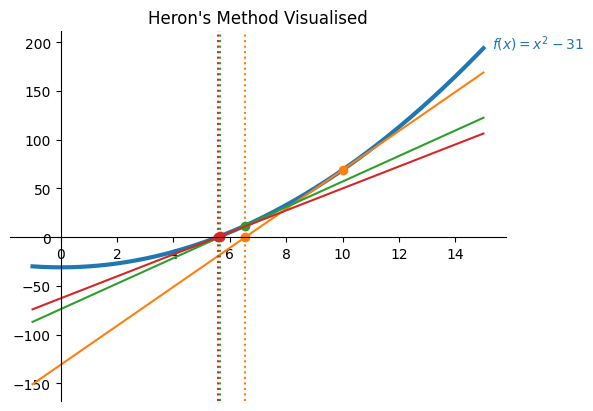

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, S):
  return x**2 - S

def dfdx(x, S):
  return 2*x

def l(x, x_n, S):
  return dfdx(x_n, S) * (x-x_n) + f(x_n, S)

def x_next(x, x_n, S):
  return (x_n + (S / x_n)) / 2

S = 31
x = np.linspace(-1, S//2, num=1000)
x_n = S//3
n = 3

plt.figure(num=0, dpi=120)
fig = plt.figure()

# f(x)
ax = fig.add_subplot(111)
ax.set_title("Heron's Method Visualised")
ax.plot(x, f(x, S), linewidth=3)
ax.text(x[-1] + 0.3, f(x[-1], S), f"$f(x)=x^2-{S}$", color='C0')

# tangent at x=a for reference
#ax.plot(x, l(x, np.sqrt(S), S), color='C0')
#ax.plot(np.sqrt(S), 0, 'C0o')
#ax.text(x[-1] + 0.3, l(x[-1], np.sqrt(S), S), f"$l_a(x)$", color='C0')

# tangents from herons
for i in range(1, n+1):
  ax.plot(x, l(x, x_n, S))
  #ax.text(x[-1] + 0.3, l(x[-1], x_n, S), f"$l_{i}(x)$", color='C'+str(i))

  ax.plot(x_n, l(x_n, x_n, S), 'C'+str(i)+'o')

  x_n = x_next(x, x_n, S)
  ax.plot(x_n, 0, 'C'+str(i)+'o')
  ax.axvline(x = x_n, color='C'+str(i), linestyle="dotted")

#axes
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

### Pseudocode
Preliminary Calculations and Discussion:

$p$ d.p. $\implies$ terminate when $x_n$ rounds to $a$ \begin{gather}\implies a-m \le x_n < a+m\\\implies x_n-m<a\le x_n+m\\\implies (x_n-m)^2<a^2\le(x_n+m)^2\end{gather} where the margin of error $m=5\cdot10^{-p-1}$ and $a$ is to $p$ d.p.<br>
But $a$ itself is rounded, so to account for the slight discrepancy between $a^2$ and $S$, restrict the margin of error further
$$
(x_n-m)^2\le S\le(x_n+m)^2, m=5\cdot10^{-p-2}
$$
<br><br>

A very good initial estimate can be obtained by rounding $S$ to the nearest even power of $2$, which is then easy to root.<br><br>


Input

---
- $S\in\mathbb{R}^+$<br>representing the value to be square rooted
- $p\in\mathbb{N}\cup\{0\}$<br>representing the number of decimal places required

Output

---
- $\sqrt{S}$ to $p$ d.p

Algorithm

---
$$\begin{align*}
&x\leftarrow2^{\lfloor\frac{\log_2(S)}{2}+\frac{1}{2}\rfloor}\\
&m\leftarrow5\cdot10^{-p-2}\\
&while\;S\notin[(x-m)^2,\;(x+m)^2]\;do:\\
&\qquad x\leftarrow\frac{1}{2}\left(x+\frac{S}{x}\right)\\
&end\;while\\
&return\;x
\end{align*}$$

### Python

In [3]:
import numpy as np
import time


def binary(S, precision):
  a = 0
  b = S
  m = 5*(10**(-precision-2))
  i = 0
  mean = S/2
  while not ((mean-m)**2 <= S <= (mean+m)**2):
    i +=1

    mean = (b+a)/2
    if S < mean**2:
      b = mean
    else:
      a = mean
  print(f"Number of iterations: {i}")
  return round(mean, precision)



def herons(S, precision):
  x = 2**round(np.log2(S)/2)
  m = 5*(10**(-precision-2))
  i = 0
  while not ((x-m)**2 <= S <= (x+m)**2):
    i += 1
    x = (x + S/x)/2
  #return x
  print(f"Number of iterations: {i}")
  return round(x, precision)

S = float(input("S: "))
precision = int(input("Precision: "))
print()

start = time.time()
print("Square root of S(naive):")
print(f"Answer: {binary(S, precision)}")
print(f"Found in {time.time() - start:.20E} secs")
print()

start = time.time()
print(f"Square root of S (herons):")
print(f"Answer: {herons(S, precision)}")
print(f"Found in {time.time() - start:.20E} secs")


Square root of S(naive):
Number of iterations: 34
Answer: 673.4716
Found in 1.68085098266601562500E-04 secs

Square root of S (herons):
Number of iterations: 4
Answer: 673.4716
Found in 1.53064727783203125000E-04 secs


### Interesting Observations
The "naive" Binary Search algorithm does not seem to have consistent difference to Heron's Method in terms of speed for almost all inputs tested. In terms of iterations though, Heron requires significantly less.<br><br>
This is likely because division by $x$ is internally calculated by repeated subtraction, thus introducing unwanted $x$ dependency, meaning subsequent iterations require significantly more time to complete. However, further investigation is needed to make a conclusive statement. It is still possible that this unexpected behaviour is merely machine or implementation specific.

## Problem 3 - Wordladder

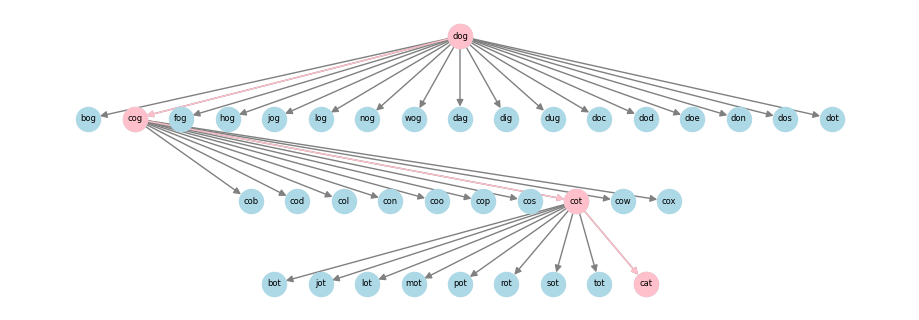

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from queue import PriorityQueue


def show(G, levels, spacing, path_nodes, path_edges):
    pos = {}
    maxl = max(levels.values())
    xdict = {level: list(levels.values()).count(level) for level in range(maxl + 1)}

    for level in range(maxl+1):
        words = [word for word, i in levels.items() if i==level]
        offset = (xdict[level]-1)/2
        for i, word in enumerate(words):
            pos[word] = ((i-offset)*spacing, maxl-level)

    plt.figure(figsize=(spacing*3,spacing))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=300, font_size=6, edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color="pink", node_size=300)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="pink")
    
    plt.show()


def priority(word, goal):
    count = len(word)
    for i in range(len(word)):
        if word[i] == goal[i]:
            count -= 1
    return count


def unseen_neighbours(word, goal):
    neighbours = {}       
    for i in range(len(word)):
        for c in range(ord('a'), ord('z')+1):
            candidate = word[:i] + chr(c) + word[i+1:]
            if candidate in unseen_words:
                if goal[i] == chr(c):
                    neighbours[candidate] = -1   # using letters different to goal as heuristic
                elif word[i] == goal[i]:         # i.e replaced word[i] in correct place with the bogus c
                    neighbours[candidate] = 1
                else:
                    neighbours[candidate] = 0
    return neighbours


def bestfs(initial, goal):
    G = nx.DiGraph()
    G.add_node(initial)
    
    q = PriorityQueue()
    q.put((priority(initial, goal), initial, 0))
    predecessors = {initial: None}
    levels = {initial: 0}
    
    while not q.empty():
        p, current, level = q.get()
        #print(p, current)

        # populate q and housekeeping
        neighs = unseen_neighbours(current, goal)
        for neigh in neighs.keys():
            # vital
            prior = p + neighs[neigh]
            unseen_words.discard(neigh)

            # for visualisation purposes
            predecessors[neigh] = current
            G.add_edge(current, neigh)
            levels[neigh] = level+1

            if prior == 0:
                return G, predecessors, levels

            q.put((p+neighs[neigh], neigh, level+1))

    return None, None, None


# dataset credit: https://www.kaggle.com/datasets/anthonytherrien/dictionary-of-english-words-and-definitions
path = "dict.csv"          # english dictionary dataset
unseen_words = set(pd.read_csv(path)["word"])    # sets are hashed, so O(1) lookup   # global variable as too large

initial = input("Initial Word: ")
unseen_words.remove(initial)
goal = input("Goal Word: ")

G, predecessors, levels = bestfs(initial, goal)
if G is None:
    print("No Solution")
else:
    # find path
    path_nodes, path_edges = [], []
    current = goal
    while not current is None:
        pred = predecessors[current]
        path_nodes.append(current)

        if not pred is None:
            path_edges.append((pred, current))
        current = pred
    
    show(G, levels, len(initial), path_nodes, path_edges)